In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
from collections import defaultdict
import random

In [7]:
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()
 
def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}


In [8]:
dataset = [['Eggs', 'Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs'],
           ['Orange', 'Corn', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Orange', 'Eggs'], 
           ['Corn', 'Coke', 'Kidney Beans', 'Ice cream'],
           ['Dill', 'Onion', 'Nutmeg'],
           ['Coke', 'Apple', 'Ice cream']
          ]

In [9]:
trans_list = tidlists(dataset)

trans_list

[('Eggs', {0, 1, 2, 4, 5, 6}),
 ('Milk', {0, 2, 3, 6}),
 ('Onion', {0, 1, 4, 8}),
 ('Nutmeg', {0, 1, 8}),
 ('Kidney Beans', {0, 2, 3, 4, 7}),
 ('Yogurt', {0, 1, 3, 5}),
 ('Dill', {1, 8}),
 ('Apple', {2, 6, 9}),
 ('Unicorn', {3}),
 ('Corn', {3, 4, 5, 7}),
 ('Ice cream', {4, 7, 9}),
 ('Orange', {5, 6}),
 ('Coke', {7, 9})]

In [11]:
result = eclat(trans_list, 2, 2)
result

{('Coke', 'Ice cream'): 2,
 ('Orange', 'Eggs'): 2,
 ('Ice cream', 'Corn'): 2,
 ('Ice cream', 'Corn', 'Kidney Beans'): 2,
 ('Ice cream', 'Kidney Beans'): 2,
 ('Corn', 'Yogurt'): 2,
 ('Corn', 'Kidney Beans'): 3,
 ('Corn', 'Eggs'): 2,
 ('Apple', 'Milk'): 2,
 ('Apple', 'Milk', 'Eggs'): 2,
 ('Apple', 'Eggs'): 2,
 ('Dill', 'Nutmeg'): 2,
 ('Dill', 'Nutmeg', 'Onion'): 2,
 ('Dill', 'Onion'): 2,
 ('Yogurt', 'Kidney Beans'): 2,
 ('Yogurt', 'Kidney Beans', 'Milk'): 2,
 ('Yogurt', 'Nutmeg'): 2,
 ('Yogurt', 'Nutmeg', 'Onion'): 2,
 ('Yogurt', 'Nutmeg', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Nutmeg', 'Eggs'): 2,
 ('Yogurt', 'Onion'): 2,
 ('Yogurt', 'Onion', 'Eggs'): 2,
 ('Yogurt', 'Milk'): 2,
 ('Yogurt', 'Eggs'): 3,
 ('Kidney Beans', 'Onion'): 2,
 ('Kidney Beans', 'Onion', 'Eggs'): 2,
 ('Kidney Beans', 'Milk'): 3,
 ('Kidney Beans', 'Milk', 'Eggs'): 2,
 ('Kidney Beans', 'Eggs'): 3,
 ('Nutmeg', 'Onion'): 3,
 ('Nutmeg', 'Onion', 'Eggs'): 2,
 ('Nutmeg', 'Eggs'): 2,
 ('Onion', 'Eggs'): 3,
 ('Milk', 'Eggs'): 3}

In [12]:
for k, v in result.items():
    if 'Milk' in k:
        print(k, ':', v)

('Apple', 'Milk') : 2
('Apple', 'Milk', 'Eggs') : 2
('Yogurt', 'Kidney Beans', 'Milk') : 2
('Yogurt', 'Milk') : 2
('Kidney Beans', 'Milk') : 3
('Kidney Beans', 'Milk', 'Eggs') : 2
('Milk', 'Eggs') : 3


In [14]:
import numpy as np

keys = result.values()
titles = result.keys()

list_titles = []

for item in titles:
    list_titles.append(', '.join(item))

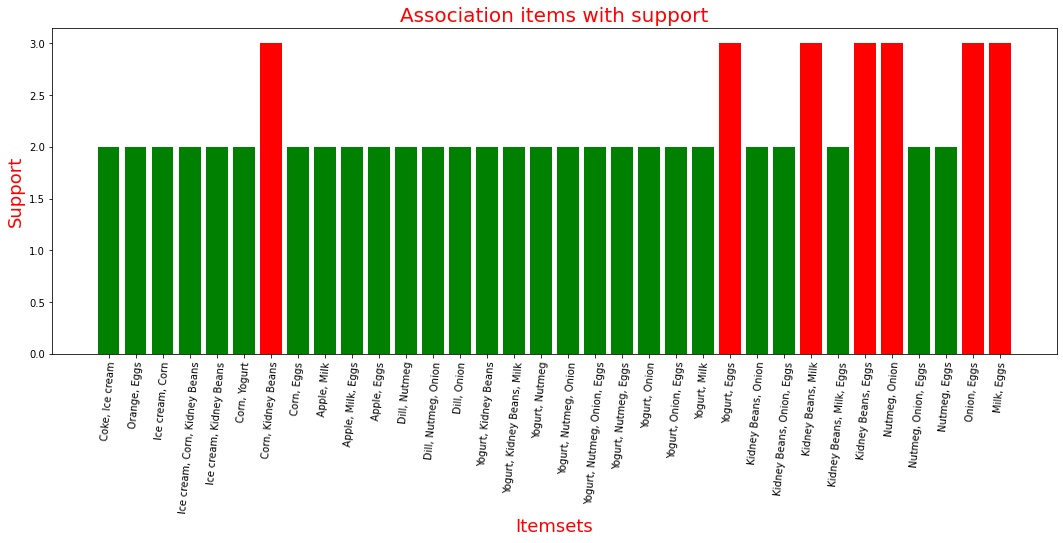

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

y = np.array(list(keys))
c = np.empty((y.shape[0], ), dtype=str)
c[y <= 2] = 'green'
c[y > 2] = 'red'

plt.bar(list_titles, keys, color=c.tolist())
plt.title('Association items with support', color='red', fontsize=20)
plt.ylabel('Support', color='red', fontsize=18)
plt.xticks(rotation=85)
plt.xlabel('Itemsets', color='red', fontsize=18)

plt.show()